In [1]:
from hilbert_curve import *
from PIL import Image, ImageDraw
from scipy.io import loadmat
import matplotlib.pyplot as plt
from rasterio import features
from scipy.interpolate import interp2d

In [2]:
# Configurações no tamanho dos gráficos do matplotlib
plt.rcParams['figure.figsize'] = [6, 4]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

In [3]:
dataset_images_path = f'../caltech-101/images'
dataset_annotations_path = f'../caltech-101/annotations'

In [4]:
class_name = 'airplanes'
img_index = '0020'

In [5]:
img_path = f'../caltech-101/images/{class_name}/image_{img_index}.jpg'
annotation_path = f'../caltech-101/annotations/{class_name}/annotation_{img_index}.mat'

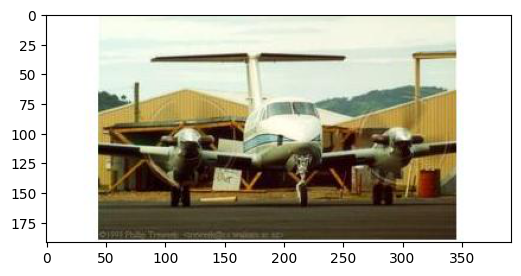

In [6]:
img_full = Image.open(img_path)
plt.imshow(np.asarray(img_full))

In [7]:
img_full.size

(392, 192)

In [8]:
ann_array = loadmat(annotation_path)
y1,y2,x1,x2 = ann_array['box_coord'][0]
y1,y2,x1,x2

(31, 165, 45, 345)

In [9]:
ann_array.keys()

dict_keys(['__header__', '__version__', '__globals__', 'box_coord', 'obj_contour'])

In [10]:
img_cut = img_full.crop((x1-1,y1-1,x2+1,y2+1))

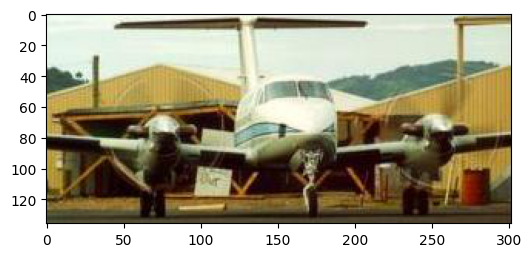

In [11]:
plt.imshow(np.asarray(img_cut))

In [12]:
contour = []
for y, x in zip(ann_array['obj_contour'][0], ann_array['obj_contour'][1]):
    contour.append(y)
    contour.append(x) 

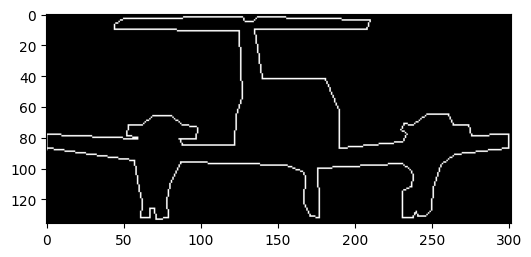

In [13]:
array_shape = np.asarray(img_cut).shape[:2]
bounds = Image.fromarray(np.zeros(array_shape))

blank = ImageDraw.Draw(bounds)
blank.line(contour, fill=255)

bounds_array = np.asarray(bounds).astype('uint8')
plt.imshow(bounds_array, "gray")

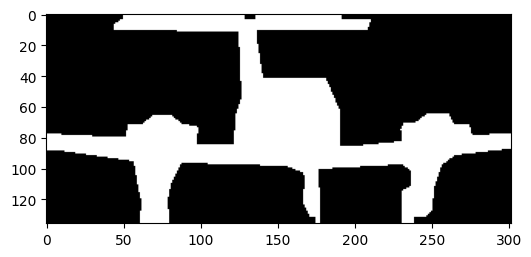

In [14]:
se = np.ones((7,7), dtype='uint8')
image_close = cv.morphologyEx(bounds_array, cv.MORPH_CLOSE, se)

cnt = cv.findContours(image_close, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)[0]
cnt_mask = np.zeros(image_close.shape[:2], np.uint8)
filled_mask = cv.drawContours(cnt_mask, cnt, -1, 255, -1)

mask = filled_mask//255
plt.imshow(mask, 'gray')

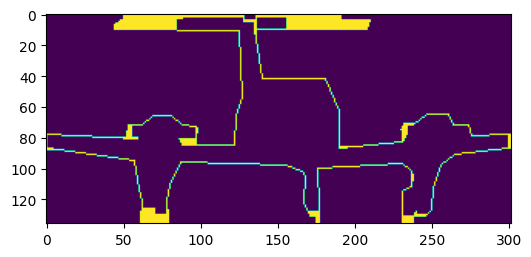

In [15]:
plt.imshow(np.asarray(image_close))

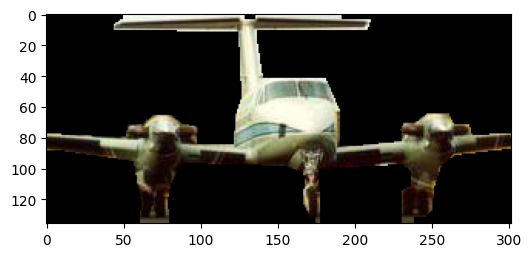

In [16]:
img_array = np.asarray(img_cut)
mask_rgb = Image.fromarray(mask).convert("RGB")
mask_rgb_array = np.asarray(mask_rgb)
final = img_array * mask_rgb
plt.imshow(final, "gray")

In [17]:
img_curve = []
n_list = [8, 16, 32, 64, 128]
rgb = Image.fromarray(final).convert("RGB")
rgb_array = np.asarray(rgb)

for n in n_list:
    curve = hilbert_order(n, img_cut.size)    
    img_curve.append(draw_curve_on_img(rgb_array, curve))     

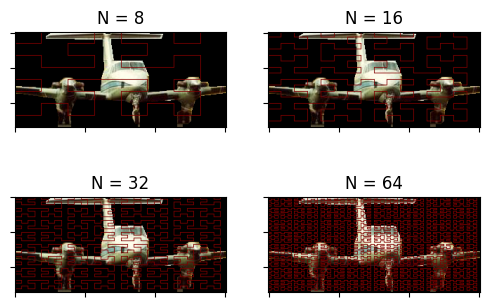

In [18]:
fig, axs = plt.subplots(2,len(n_list)//2)
# fig.tick_params(axis='x', which='both', bottom=False, labelbottom=False)
n=0

for i in range(len(n_list)//2):
    for j in range(len(n_list)//2):
        axs[i,j].imshow(img_curve[n], 'gray')
        axs[i,j].set_title(f'N = {n_list[n]}')
        axs[i,j].tick_params(which='both', labelleft=False, labelbottom=False)
#         axs[i,j].tick_params(axis='y', which='both', bottom=False, labelbottom=False)
        n+=1

In [19]:
#fig.savefig('../img/hilbert/hilber-curve-motorbike.jpg')